In [1]:
import dlc_bci as bci

In [2]:
import torch
from torch import cuda , nn , optim
from torch.optim import lr_scheduler 
from torch.nn import functional as F 
from torch.autograd import Variable 

In [3]:
torch.__version__

'0.3.1.post2'

In [4]:
import numpy as np
from sklearn import svm 

In [5]:
train_input, train_target = bci.load(root='./data_bci')
test_input, test_target = bci.load(root='./data_bci', train=False)
print(str(type(train_input)), train_input.size()) 
print(str(type(train_target)), train_target.size())
print(str(type(test_input)), test_input.size()) 
print(str(type(test_target)), test_target.size())

<class 'torch.FloatTensor'> torch.Size([316, 28, 50])
<class 'torch.LongTensor'> torch.Size([316])
<class 'torch.FloatTensor'> torch.Size([100, 28, 50])
<class 'torch.LongTensor'> torch.Size([100])


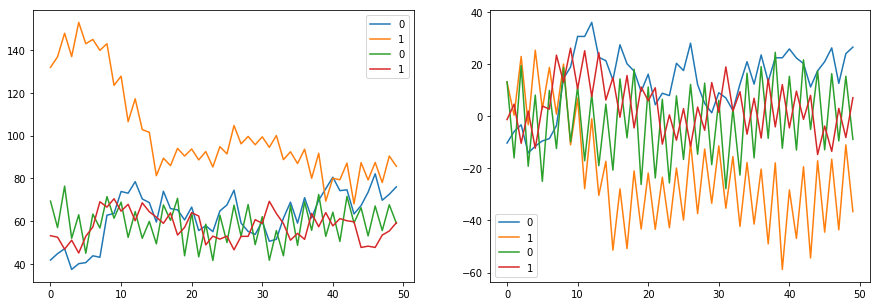

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(range(50),np.array(train_input[0,0]))
ax[0].plot(range(50),np.array(train_input[1,0]))
ax[0].plot(range(50),np.array(train_input[2,0]))
ax[0].plot(range(50),np.array(train_input[3,0]))
ax[0].legend(train_target[:4])
ax[1].plot(range(50),np.array(train_input[0,1]))
ax[1].plot(range(50),np.array(train_input[1,1]))
ax[1].plot(range(50),np.array(train_input[2,1]))
ax[1].plot(range(50),np.array(train_input[3,1]))
ax[1].legend(train_target[:4])

In [7]:
# TODO: Randomly choose train and test set #

In [8]:
# Normalization
mu, std = train_input.mean(), train_input.std()
train_input.sub_(mu).div_(std)
test_input.sub_(mu).div_(std)
# convert to Variable
train_input, train_target = Variable(train_input), Variable(train_target)
test_input, test_target = Variable(test_input), Variable(test_target)

## Support Vector Machine -- Baseline

In [9]:
X_train = train_input.view(316,-1)
y_train = train_target
X_test = test_input.view(100,-1)
y_test = test_target

In [10]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train.data, y_train.data)
clf.score(X_test.data, y_test.data)

0.75

# Neural Network

In [ ]:
## OLD
#train_input = train_input.view(316,1,50,28)
#test_input = test_input.view(100,1,50,28)

In [ ]:
'''
class Net_OLD(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 30, kernel_size=(7,1))
        self.conv1_drop = nn.Dropout(0.3)
        self.conv2 = nn.Conv2d(30, 10, kernel_size=(5,5))
        self.conv2_drop = nn.Dropout(0.3)
        self.conv3 = nn.Conv2d(10, 5, kernel_size=(1,1))
        self.conv3_drop = nn.Dropout(0.3)
        self.fc1 = nn.Linear(1200,120)
        self.fc1_drop = nn.Dropout(0.3)
        self.fc2 = nn.Linear(120,100)
        self.fc2_drop = nn.Dropout(0.3)
        self.fc3 = nn.Linear(100,2)
    def forward(self, x): 
        x = F.relu(self.conv1(x))
        x = self.conv1_drop(x)
        x = F.relu(self.conv2(x))
        x = self.conv2_drop(x)
        x = F.relu(self.conv3(x))
        x = self.conv3_drop(x)
        
        x = F.max_pool2d(x, (2,2))
        
        x = x.view(x.size(0),-1)
       
        x = F.relu(self.fc1(x))
        x = self.fc1_drop(x)
        x = F.relu(self.fc2(x))
        x = self.fc2_drop(x)
        x = F.relu(self.fc3(x))
        return x
'''

In [ ]:
#train_input = train_input.view(316,1,28,50)
#test_input = test_input.view(100,1,28,50)

In [ ]:
'''
class Net_2D(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 50, kernel_size=(5,5))
        self.conv1_drop = nn.Dropout(0.3)
        self.conv2 = nn.Conv2d(50, 100, kernel_size=(2,2))
        self.conv2_drop = nn.Dropout(0.3)
        self.conv3 = nn.Conv2d(100, 200, kernel_size=(1,1))
        self.conv3_drop = nn.Dropout(0.3)
        
        self.fc1 = nn.Linear(2000,500)
        self.fc1_drop = nn.Dropout(0.3)
        self.fc2 = nn.Linear(500,100)
        self.fc2_drop = nn.Dropout(0.3)
        self.fc3 = nn.Linear(100,20)
        self.fc3_drop = nn.Dropout(0.3)
        self.fc4 = nn.Linear(20,2)
        
    def forward(self, x): 
        x = F.relu(self.conv1(x))
        x = self.conv1_drop(x)
        x = F.max_pool2d(x, (2,2))
        
        x = F.relu(self.conv2(x))
        x = self.conv2_drop(x)
        x = F.max_pool2d(x, (2,2))
        
        x = F.relu(self.conv3(x))
        x = self.conv3_drop(x)
        x = F.max_pool2d(x, (2,2))
        
        x = x.view(x.size(0), -1)
        
        x = F.relu(self.fc1(x))
        x = self.fc1_drop(x)
        x = F.relu(self.fc2(x))
        x = self.fc2_drop(x)
        x = F.relu(self.fc3(x))
        x = self.fc3_drop(x)
        
        x = F.softmax(self.fc4(x), 1)
        return x
'''

In [11]:
train_input = train_input.view(316,28,50)
test_input = test_input.view(100,28,50)

In [12]:
class Net_1D(nn.Module):
    def __init__(self):
        super(Net_1D, self).__init__()
        
        self.conv1 = nn.Conv1d(28, 50, kernel_size=5)
        self.conv1_bn = nn.BatchNorm1d(50)
        self.conv1_drop = nn.Dropout(0.3)
        
        self.conv2 = nn.Conv1d(50, 100, kernel_size=5)
        self.conv2_bn = nn.BatchNorm1d(100)
        self.conv2_drop = nn.Dropout(0.3)
        
        self.fc1 = nn.Linear(1400,500)
        self.fc1_bn = nn.BatchNorm1d(500)
        self.fc1_drop = nn.Dropout(0.3)
        
        self.fc2 = nn.Linear(500,100)
        self.fc2_bn = nn.BatchNorm1d(100)
        self.fc2_drop = nn.Dropout(0.3)
        
        self.fc3 = nn.Linear(100,2)
        
    def forward(self, x): 
        
        x = F.relu(self.conv1_bn(self.conv1(x)))
        #x = F.max_pool1d(x, 3)
        x = self.conv1_drop(x)
        
        
        x = F.relu(self.conv2_bn(self.conv2(x)))
        x = F.max_pool1d(x, 3)
        x = self.conv2_drop(x)
        
        x = x.view(x.size(0), -1)
        
        x = F.relu(self.fc1_bn(self.fc1(x)))
        x = self.fc1_drop(x)
        
        x = F.relu(self.fc2_bn(self.fc2(x)))
        x = self.fc2_drop(x)
        
        x = F.softmax(self.fc3(x), 1)
        return x

In [13]:
# test the structure
model = Net_1D()
print(model(train_input).shape)

torch.Size([316, 2])


In [14]:
def train_model(model, train_input, train_target):
    lr, nb_epochs = 1e-3, 150
    #optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=1e-2) # lr=1e-1
    #optimizer = optim.Adadelta(model.parameters(), lr=lr, weight_decay=1e-3) # lr=1e-1
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1) # lr=1e-3

    scheduler = lr_scheduler.StepLR(optimizer, step_size=75, gamma=0.5)
    
    criterion = torch.nn.CrossEntropyLoss()
    errors = []
    losses = []
    for k in range(nb_epochs):
        scheduler.step()
        
        optimizer.zero_grad()
        output = model(train_input) 
        loss = criterion(output, train_target)
        loss.backward()
        optimizer.step()
        
        pred = output.data.max(1, keepdim=True)[1]
        error = pred.ne(train_target.data.view_as(pred)).sum()
        if k%10==0 : print(k, error, loss.data[0])
        errors.append(error)
        losses.append(loss.data[0])
    return errors, losses

In [15]:
def compute_nb_errors(model, data_input, data_target):
    nb_errors = 0
    output = model.forward(data_input)
    pred = output.data.max(1, keepdim=True)[1]
    nb_errors = pred.ne(data_target.data.view_as(pred)).sum()
    return nb_errors

0 148 0.6949793696403503
10 146 0.6868038177490234
20 104 0.661837637424469
30 83 0.6143171191215515
40 70 0.5780310034751892
50 40 0.5445356369018555
60 38 0.5295507907867432
70 33 0.5293342471122742
80 24 0.5101994276046753
90 19 0.4974254071712494
100 18 0.4891223609447479
110 10 0.4833518862724304
120 12 0.4868781268596649
130 12 0.48732689023017883
140 17 0.4952538013458252


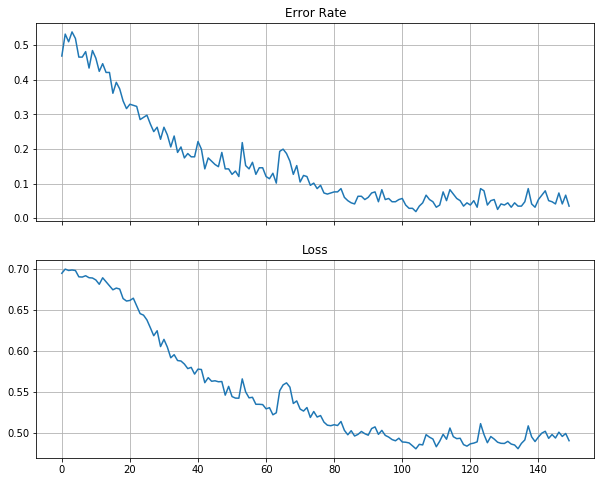

Correct: 76.00%


In [16]:
model = Net_1D()

errors, losses = train_model(model, train_input, train_target)

fig, ax = plt.subplots(2, 1, figsize=(10,8), sharex=True)
ax[0].plot(np.array(errors)/train_input.size(0))
ax[0].set_title("Error Rate")
ax[0].grid()
ax[1].plot(np.array(losses))
ax[1].set_title("Loss")
ax[1].grid()
plt.show();

nb_error = compute_nb_errors(model, test_input, test_target)
print('Correct: {:.2%}'.format(1-nb_error/test_input.size(0)))

# LSTM - Unfinished Overfitting

In [17]:
train_input = train_input.view(316,50,28)
test_input = test_input.view(100,50,28)

In [18]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.LSTM(         # if use nn.RNN(), it hardly learns
            input_size=28,
            hidden_size=10,         # rnn hidden unit
            num_layers=2,           # number of rnn layer
            batch_first=True,       # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
            dropout=0.5,
        )
        self.bn  = nn.BatchNorm2d(10)
        self.out = nn.Linear(10, 2)
        
    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, None)   # None represents zero initial hidden state

        # choose r_out at the last time step
        out = F.softmax(self.out(self.bn(r_out[:, -1, :])), 1)
        return out

In [19]:
# test the structure
model = RNN()
print(model(train_input).shape)

torch.Size([316, 2])


In [20]:
def train_model(model, train_input, train_target):
    lr, nb_epochs = 1e-2, 200
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=5e-3)

    scheduler = lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)
    
    criterion = torch.nn.CrossEntropyLoss()
    errors = []
    losses = []
    for k in range(nb_epochs):
        scheduler.step()
        
        optimizer.zero_grad()
        output = model(train_input) 
        loss = criterion(output, train_target)
        loss.backward()
        optimizer.step()
        
        pred = output.data.max(1, keepdim=True)[1]
        error = pred.ne(train_target.data.view_as(pred)).sum()
        if k%10==0 : print(k, error, loss.data[0])
        errors.append(error)
        losses.append(loss.data[0])
    return errors, losses

0 164 0.7039636969566345
10 151 0.6876636743545532
20 147 0.6876260042190552
30 122 0.6588642597198486
40 128 0.6552749872207642
50 122 0.6406879425048828
60 112 0.6413792967796326
70 111 0.6289328336715698
80 107 0.6342202425003052
90 100 0.6171753406524658
100 106 0.628391444683075
110 96 0.6155493855476379
120 115 0.6325200200080872
130 102 0.6191902756690979
140 106 0.6078622341156006
150 104 0.6071926355361938
160 102 0.6143531799316406
170 95 0.5983678102493286
180 93 0.5954449772834778
190 93 0.5968795418739319


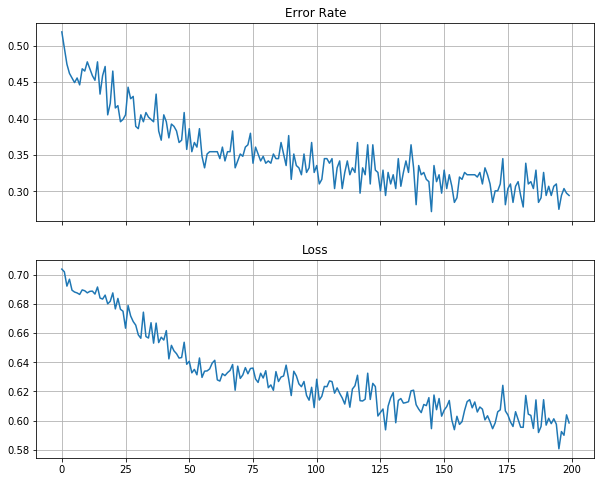

Correct: 52.00%


In [21]:
model = RNN()

errors, losses = train_model(model, train_input, train_target)

fig, ax = plt.subplots(2, 1, figsize=(10,8), sharex=True)
ax[0].plot(np.array(errors)/train_input.size(0))
ax[0].set_title("Error Rate")
ax[0].grid()
ax[1].plot(np.array(losses))
ax[1].set_title("Loss")
ax[1].grid()
plt.show();

nb_error = compute_nb_errors(model, test_input, test_target)
print('Correct: {:.2%}'.format(1-nb_error/test_input.size(0)))